In [293]:
%matplotlib notebook

import pandas as pd 
import matplotlib.pyplot as plt
from textwrap import wrap
import numpy as np

files_2node = ["wnio_18_0-bw", "wnio_18_1-bw",
               "wnio4ch_18_0-bw", "wnio4ch_18_1-bw",
                "mpi_N2_18_0-bw","mpi_N2_18_1-bw"]
files_4node = ["fcio_18_0-bw", "fcio_18_1-bw",
               "mpi_N4_18_0-bw", "mpi_N4_18_1-bw"]
head = ('elem', 'n', 'pN', 'min_e', 'max_e', 'avg_e','min_s', 'max_s', 'avg_s', 'min_r', 'max_r', 'avg_r', 'size', 'nerror', 'l2_error')
# headmax = ('elem', 'n', 'pN', 'min_e', 'max_e', 'avg_e', 'size', 'nerror', 'l2_error')

# headmain = ("elements",
#         "fc_18_0", "fc_18_1", "fcio_18_0", "fcio_18_1",
#         "wn_18_0", "wn_18_1","wnio_18_0", "wnio_18_1",
#         "mpi_N2_18_0","mpi_N2_18_1", "mpi_N4_18_0","mpi_N4_18_1")

# datafile = pd.read_csv('final_consolidated.csv'
#                         , delimiter=',',
#                           names=headmain, skiprows=1)
# dataraw['elements'] = datafile['elements']

# print(data)


def read_and_buid(files):
    dataraw = pd.DataFrame()
    for file in files:
        filename = 'final_'+file+'.csv'
        print(filename)
        datafile = pd.read_csv(filename, delimiter=',',
                              names=head, skiprows=1)
        if "18_0" in file:
            file = file.replace('18_0-bw', 'bw_18_0')
        else:
            file = file.replace('18_1-bw', 'bw_18_1')
        print(file)
        dataraw['elements'] = datafile['elem']
        dataraw['size'] = datafile['size']
        dataraw[file+'_min_e'] = datafile['min_e']
        dataraw[file+'_max_e'] = datafile['max_e']
        dataraw[file+'_e'] = datafile['avg_e']

        dataraw[file+'_min_s'] = datafile['min_s']
        dataraw[file+'_max_s'] = datafile['max_s']
        dataraw[file+'_s'] = datafile['avg_s']

        dataraw[file+'_min_r'] = datafile['min_r']
        dataraw[file+'_max_r'] = datafile['max_r']
        dataraw[file+'_r'] = datafile['avg_r']
        
    return dataraw


def segregate(dataraw):
    dataraw = dataraw.sort_values(by=['elements'])
    data_1k = dataraw[0:30]
    data_2k = dataraw[30:60]
    data_5k = dataraw[60:90]
    data_10k = dataraw[90:120]
    data_20k = dataraw[120:150]
    data_50k = dataraw[150:180]
    data_100k = dataraw[180:210]
    data_200k = dataraw[210:240]

    data = pd.DataFrame(columns=dataraw.columns)
    data.loc['1k'] = data_1k.mean()
    data.loc['2k'] = data_2k.mean()
    data.loc['5k'] = data_5k.mean()
    data.loc['10k'] = data_10k.mean()
    data.loc['20k'] = data_20k.mean()
    data.loc['50k'] = data_50k.mean()
    data.loc['100k'] = data_100k.mean()
    data.loc['200k'] = data_200k.mean()
    
    return data

def compute_min_max(files, data):
    for file in files:
        if "18_0" in file:
            file = file.replace('18_0-bw', 'bw_18_0')
        else:
            file = file.replace('18_1-bw', 'bw_18_1')

        data[file+'_min_e'] = data[file+'_e'] - data[file+'_min_e']
        data[file+'_max_e'] = data[file+'_max_e'] - data[file+'_e']
        data[file+'_min_s'] = data[file+'_s'] - data[file+'_min_s']
        data[file+'_max_s'] = data[file+'_max_s'] - data[file+'_s']
        data[file+'_min_r'] = data[file+'_r'] - data[file+'_min_r']
        data[file+'_max_r'] = data[file+'_max_r'] - data[file+'_r']


data2node = read_and_buid(files_2node)
# print(data2node)
data2node = segregate(data2node)
compute_min_max(files_2node, data2node)
data2node = data2node.reset_index()

data4node = read_and_buid(files_4node)
data4node = segregate(data4node)
compute_min_max(files_4node, data4node)

data4node = data4node.reset_index()
# data
# print(data[['elements','size']])
def add_annotation(ax, data, name):
    count = 0
    for index, entry in data.iterrows():
    
        if entry[name] > 1.0:
            ax.annotate("{:.2f}".format(entry[name]), xy=(count,entry[name]), color='green',
                              textcoords='offset points', xytext=(-4,4),
                              bbox=dict(boxstyle="round", fc="1"))
        else:
            ax.annotate("{:.2f}".format(entry[name]), xy=(count, entry[name]), color='red',
                              textcoords='offset points', xytext=(-4,4),
                              bbox=dict(boxstyle="round", fc="1"))
        count = count+1
def plot_data(ax, data1, data2, yerr):
    data1.plot(x='elements', kind='bar', rot = 0, ax=ax, yerr = yerr, capsize=4, colormap='Paired')
    ax2 = ax.twinx()
    data2.plot(x='index', linestyle='-', marker='o', color='c', ax = ax2)
    return ax2
    # print(data1[['elem','per_opt_mpi']])

    
def plot_bw(ax, data1, yerr, name1, name2):
    ax.plot(data1['size'], data1['name1'], 'r-',
                label='%s'%name1)
    ax.plot(data1['size'], data1['name2'], 'y:',
                label='%s'%name2)
    return ax2
    # print(data1[['elem','per_opt_mpi']])

def plot_comparison(data, designs, param, nrows=0, ncols=1,  savename=None):

    figk_ax2 = []
    if nrows==0:
        nrows = len(designs)
    figk_fig, figk_ax  = plt.subplots(ncols=ncols, nrows=nrows, figsize=(6,5), tight_layout=True)

        

    current = 0
    design1 = None
    design2 = None
    for d1, d2, vstr in designs:
        data[d2+'_'+d1+'_'+vstr+'_'+param] = data[d1+'_'+vstr+'_'+param]/ data[d2+'_'+vstr+'_'+param]
        print(d1, d2, vstr)
        design1 = d1
        design2 = d2
        ax = figk_ax[current]
        err = data[[d1+'_'+vstr+'_min'+'_'+param,
                    d1+'_'+vstr+'_max'+'_'+param,
                    d2+'_'+vstr+'_min'+'_'+param,
                    d2+'_'+vstr+'_max'+'_'+param]].T.values
        ax2 = plot_data(ax, data[['elements', d1+'_'+vstr+'_'+param, d2+'_'+vstr+'_'+param]],
                        data[['index',d2+'_'+d1+'_'+vstr+'_'+param]],
                        err)
#         ax2 = plot_bw(ax, data[['size', d1+'_'+vstr+'_'+param, d2+'_'+vstr+'_'+param]],
#                         ,
#                         err)
        figk_ax2.append(ax2)
        add_annotation(ax2, data[['index',d2+'_'+d1+'_'+vstr+'_'+param]], d2+'_'+d1+'_'+vstr+'_'+param)
        figk_ax[current].set_title("\n".join(wrap(d2+'_'+d1+'_'+vstr+'_'+param, 60)))
        ax.set_xlabel('Mesh Elements')
        ax.set_ylabel('Time (in secs)')

        ax2.set_ylabel('Speedup', color='c')
        ax2.get_legend().remove()
        h1, l1 = ax.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax.legend(h1+h2, [design1, design2, 'Speedup'], loc=2)
        current = current+1
     
    if savename == None:
        figk_fig.savefig(d2+'_'+d1+'.pgf')
        figk_fig.savefig(d2+'_'+d1+'.pdf')
    else:
        figk_fig.savefig(str(savename)+'.pgf')
        figk_fig.savefig(str(savename)+'.pdf')
        

def plot_speedupdata(ax, data, linestyle='-', color='c'):
    data.plot(x='index', linestyle=linestyle, marker='o', color=color, ax = ax)

# def format_xaxis(value, tick_number):
# #     if()
# #     datasize = float("{0:.2f}".format(value/(1024*1024)))
#     print("format axis")
#     values = ['1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k']
#     print(value, tick_number)
#     return values[tick_number]

def plot_speedup(data, designs, colors, lines, title,param,  savename=None, a=True, fig=None, ax1=None, ax2=None ):
    if (ax1 == None):
        figk_ax2 = []
        figk_fig, figk_ax  = plt.subplots(figsize=(6,5), tight_layout=True)
    else:
        figk_fig = fig
        figk_ax2 = ax2
        figk_ax = ax1
    current = 0
    design1 = None
    design2 = None
#     figk_ax.xaxis.set_major_formatter(plt.FuncFormatter(format_xaxis)) 
    for d1, d2, vstr in designs:
        data[d2+'_'+d1+'_'+vstr+'_'+param] = data[d1+'_'+vstr+'_'+param]/ data[d2+'_'+vstr+'_'+param]
        print(d1, d2, vstr)
        design1 = d1
        design2 = d2
#         err = data[[d1+'_'+vstr+'_min',d1+'_'+vstr+'_max', d1+'_'+vstr+'_min',d1+'_'+vstr+'_max']].T.values
#         ax2 = plot_data(figk_ax[current], data[['elements', d1+'_'+vstr, d2+'_'+vstr]], data[['index',d2+'_'+d1+'_'+vstr]],
#                         err)
        plot_speedupdata(figk_ax, data[['index',d2+'_'+d1+'_'+vstr+'_'+param]], lines[current], colors[current])
#         figk_ax2.append(ax2)
        if a:
            add_annotation(figk_ax, data[['index',d2+'_'+d1+'_'+vstr+'_'+param]], d2+'_'+d1+'_'+vstr+'_'+param)
        
        current = current+1
   
    figk_ax.set_title("\n".join(wrap(title, 60)))
    figk_ax.set_ylabel('Speedup')
#     print(data['index'])
    figk_ax.set_xticklabels(['10','1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k'])
    figk_ax.set_xlabel('Mesh Elements')
    figk_ax.legend()
    

    if savename == None:
        savename =d2+'_'+d1
    
    print('Saving file in '+str(savename))
    figk_fig.savefig(str(savename)+'.pgf')
    figk_fig.savefig(str(savename)+'.pdf')
    
    return figk_fig, figk_ax, figk_ax2

def add_bw_annotation(ax, data, name1, name2):
    count = 0
#     print(name1, name2)
    for index, entry in data.iterrows():
    
        if entry[name1] > 1.0:
#             print(entry[name1],  entry[name1.replace('s', 'r')])
            value = (entry[name1] + entry[name1.replace('s', 'r')])/2
            ax.annotate("{:.2f}".format(value/(1000)), xy=(entry['size'],entry[name1]), color='green',
                              textcoords='offset points', xytext=(-4,4),
                              bbox=dict(boxstyle="round", fc="1"))
        else:
            ax.annotate("{:.2f}".format(value/(1000)), xy=(entry['size'], entry[name1]), color='red',
                              textcoords='offset points', xytext=(-4,4),
                              bbox=dict(boxstyle="round", fc="1"))
        if name2:
            if entry[name2] > 1.0:
    #             print(entry[name2], entry[name2.replace('s', 'r')])
                value =(entry[name2] + entry[name2.replace('s', 'r')])/2
                ax.annotate("{:.2f}".format(value/(1000)), xy=(entry['size'],entry[name2]), color='green',
                                  textcoords='offset points', xytext=(-4,4),
                                  bbox=dict(boxstyle="round", fc="1"))
            else:
                ax.annotate("{:.2f}".format(value/(1000)), xy=(entry['size'], entry[name2]), color='red',
                                  textcoords='offset points', xytext=(-4,4),
                                  bbox=dict(boxstyle="round", fc="1"))
        count = count+1

def plot_bw(ax, data1, yerr, name1, name2, color1, color2, ls):
    ax.set_xscale('log', basex=2)
#     ax.set_yscale('log', basey=2)
    ax.errorbar(data1['size'], data1[name1],
                yerr=yerr[:2], color=color1, ls=ls,
                marker='*', capsize=3, capthick=0.5, ecolor='black',
                label='%s'% name1.replace('_s','_send') if '_s' in name1 else name1.replace('_r','_recv'))
    if (name2):
        ax.errorbar(data1['size'], data1[name2],
                    yerr=yerr[2:], color=color2, ls=ls,
                    marker='*', capsize=3, capthick=0.5, ecolor='black',
                    label='%s'% (name2.replace('_s','_send') if '_s' in name2 else name2.replace('_r','_recv')))
    # print(data1[['elem','per_opt_mpi']])
def format_xaxis(value, tick_number):
#     if()
    datasize = float("{0:.2f}".format(value/(1024)))
#     print(value, tick_number, datasize)
    return datasize
def plot_bw_comparison(data, designs, params, colors, nrows=0, ncols=1,
                       savename=None, a=True, fig= None, ax1=[], ax2=None, plot2=True):
    if (len(ax1) == 0):
        figk_ax2 = []
        if nrows==0:
            nrows = len(designs)
        figk_fig, figk_ax  = plt.subplots(ncols=ncols, nrows=nrows, figsize=(6,8), tight_layout=True)
    else:
        figk_fig = fig
        figk_ax2 = ax2
        figk_ax = ax1

    current = 0
    design1 = None
    design2 = None
    for param, color in zip(params, colors):
        current = 0
        for d1, d2, vstr in designs:
#             data[d2+'_'+d1+'_'+vstr+'_'+param] = data[d1+'_'+vstr+'_'+param]/ data[d2+'_'+vstr+'_'+param]
            print(d1, d2, vstr)
            design1 = d1
            design2 = d2
            ax = figk_ax[current]
            err = data[[d1+'_'+vstr+'_min'+'_'+param,
                        d1+'_'+vstr+'_max'+'_'+param,
                        d2+'_'+vstr+'_min'+'_'+param,
                        d2+'_'+vstr+'_max'+'_'+param]].T.values
    #         ax2 = plot_data(ax, data[['elements', d1+'_'+vstr+'_'+param, d2+'_'+vstr+'_'+param]],
    #                         data[['index',d2+'_'+d1+'_'+vstr+'_'+param]],
    #                         err)
            ax.xaxis.set_major_formatter(plt.FuncFormatter(format_xaxis))

            plot_bw(ax, data[['size', d1+'_'+vstr+'_'+param, d2+'_'+vstr+'_'+param]],
                            err,
                            d1+'_'+vstr+'_'+param,
                            d2+'_'+vstr+'_'+param if plot2 else None,
                            color[0], color[1],
                            ':' if param=='s' else '-')
    #         figk_ax2.append(ax2)
            if a and 's' == param:
                add_bw_annotation(ax, data,
                                  d1+'_'+vstr+'_'+param,
                                  d2+'_'+vstr+'_'+param if plot2 else None)
            if plot2:
                figk_ax[current].set_title("\n".join(wrap(d2+'_'+d1+'_'+vstr, 60)))
            ax.set_xlabel('Data Size In log(base2) KBytes')
            ax.set_ylabel('Bandwidth (MB/s)')

#             ax.legend(loc=2)
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)
            current = current+1
     
    if savename == None:
        figk_fig.savefig(d2+'_'+d1+'.pgf')
        figk_fig.savefig(d2+'_'+d1+'.pdf')
    else:
        figk_fig.savefig(str(savename)+'.pgf')
        figk_fig.savefig(str(savename)+'.pdf')
    
    return figk_fig, figk_ax, figk_ax2


#     return datasize     

final_wnio_18_0-bw.csv
wnio_bw_18_0
final_wnio_18_1-bw.csv
wnio_bw_18_1
final_wnio4ch_18_0-bw.csv
wnio4ch_bw_18_0
final_wnio4ch_18_1-bw.csv
wnio4ch_bw_18_1
final_mpi_N2_18_0-bw.csv
mpi_N2_bw_18_0
final_mpi_N2_18_1-bw.csv
mpi_N2_bw_18_1
final_fcio_18_0-bw.csv
fcio_bw_18_0
final_fcio_18_1-bw.csv
fcio_bw_18_1
final_mpi_N4_18_0-bw.csv
mpi_N4_bw_18_0
final_mpi_N4_18_1-bw.csv
mpi_N4_bw_18_1


<IPython.core.display.Javascript object>


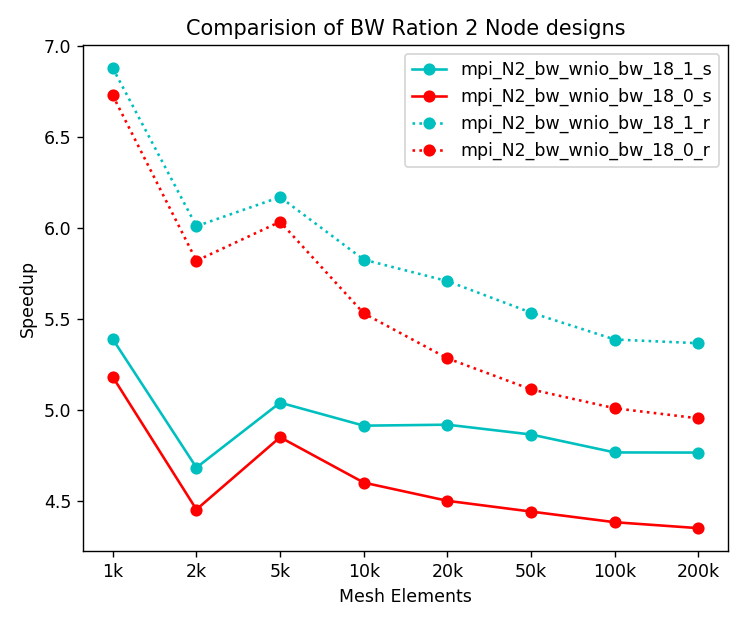

wnio_bw mpi_N2_bw 18_1
wnio_bw mpi_N2_bw 18_0
Saving file in bwspeed_1
wnio_bw mpi_N2_bw 18_1
wnio_bw mpi_N2_bw 18_0
Saving file in bwspeed_1


<IPython.core.display.Javascript object>


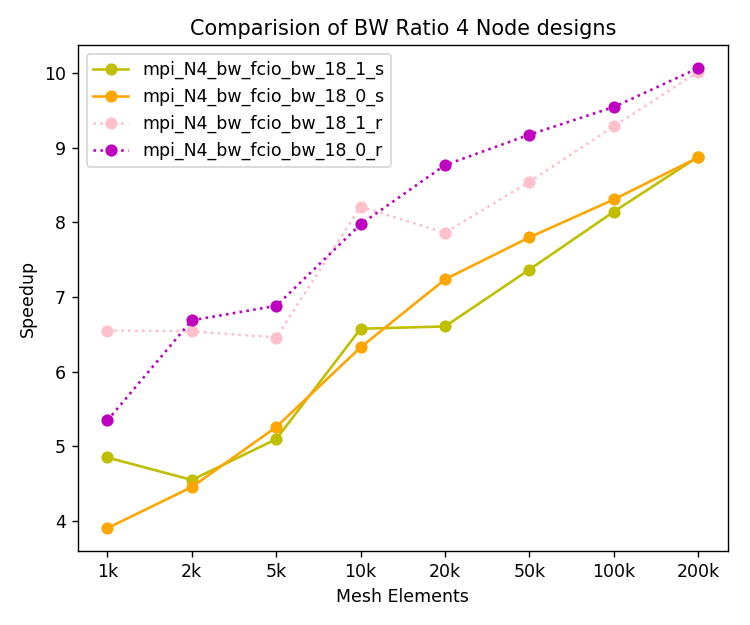

fcio_bw mpi_N4_bw 18_1
fcio_bw mpi_N4_bw 18_0
Saving file in bwspeed_2
fcio_bw mpi_N4_bw 18_1
fcio_bw mpi_N4_bw 18_0
Saving file in bwspeed_2


In [294]:
designs = [['wnio_bw','mpi_N2_bw', '18_1'], ['wnio_bw', 'mpi_N2_bw',  '18_0'],
           ['fcio_bw','mpi_N4_bw',  '18_1'], [ 'fcio_bw', 'mpi_N4_bw','18_0'],
           ['wnio4ch_bw','mpi_N2_bw', '18_1'], ['wnio4ch_bw', 'mpi_N2_bw',  '18_0']]

colors = ['c','r','g','b']
lines = ['-','-',':',':']
fig, ax1, ax2 = plot_speedup(data2node,  designs[:2], colors, lines,
             'Comparision of BW Ratio 2 Node designs ', 's', savename='bwspeed_1', a=False)
plot_speedup(data2node,  designs[:2], colors[:2], lines[2:],
             'Comparision of BW Ration 2 Node designs', 'r', savename='bwspeed_1', a=False, fig=fig, ax1=ax1, ax2=ax2)
# plot_speedup(data2node,  designs[4:], colors[2:], lines[:2],
#              'Comparision of BW speedup ', 's', savename='bwspeed', a=False, fig=fig, ax1=ax1, ax2=ax2)
# plot_speedup(data2node,  designs[4:], colors[2:], lines[2:],
#              'Comparision of BW speedup ', 'r', savename='bwspeed', a=False, fig=fig, ax1=ax1, ax2=ax2)

ax1.legend()
colors2 = ['y','orange','pink','m']
lines2 = ['-','-',':',':']
fig, ax1, ax2 = plot_speedup(data4node,  designs[2:4], colors2[:2], lines2[:2],
             'Comparision of BW Ratio 4 Node designs ', 's', savename='bwspeed_2', a=False)
plot_speedup(data4node,  designs[2:4], colors2[2:], lines2[2:],
             'Comparision of BW Ratio 4 Node designs ', 'r', savename='bwspeed_2', a=False, fig=fig, ax1=ax1, ax2=ax2)
ax1.legend()


<IPython.core.display.Javascript object>


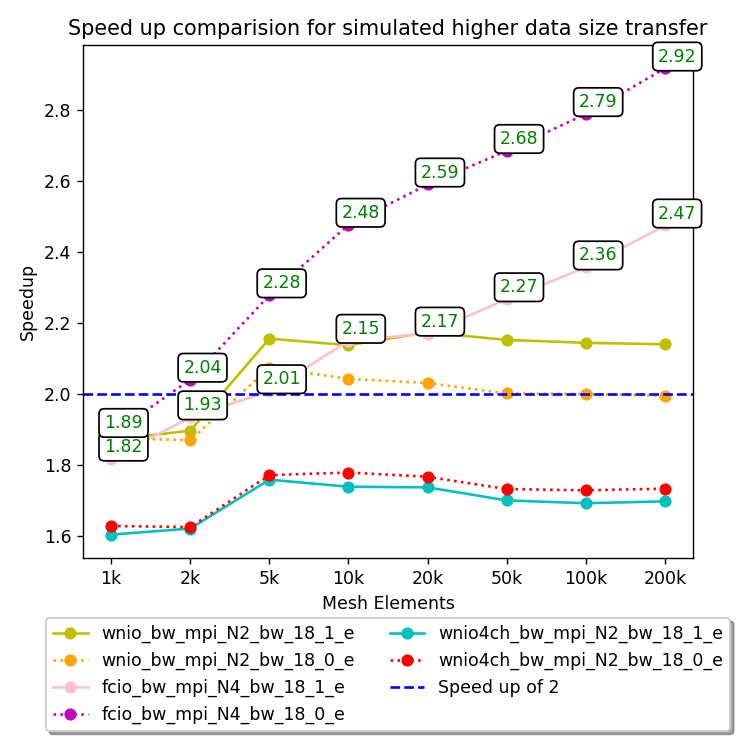

mpi_N2_bw wnio_bw 18_1
mpi_N2_bw wnio_bw 18_0
Saving file in bwspeed_com
mpi_N4_bw fcio_bw 18_1
mpi_N4_bw fcio_bw 18_0
Saving file in bwspeed_com
mpi_N2_bw wnio4ch_bw 18_1
mpi_N2_bw wnio4ch_bw 18_0
Saving file in bwspeed_com


In [291]:
############################################
# MPI vs IO channels Comp
############################################


designs = [['mpi_N2_bw', 'wnio_bw', '18_1'], ['mpi_N2_bw', 'wnio_bw',  '18_0'],
           ['mpi_N4_bw','fcio_bw', '18_1'], [ 'mpi_N4_bw','fcio_bw','18_0'],
          ['mpi_N2_bw', 'wnio4ch_bw','18_1'], [ 'mpi_N2_bw','wnio4ch_bw',  '18_0']]

colors2 = ['y','orange','pink','m','c','r']
lines2 = ['-',':','-',':', '-',':']
fig, ax1, ax2 = plot_speedup(data2node,  designs[:2], colors2[:2], lines2[:2],
             'Speed up comparision for simulated higher data size transfer', 'e', savename='bwspeed_com', a=False)
plot_speedup(data4node,  designs[2:4], colors2[2:], lines2[2:],
             'Speed up comparision for simulated higher data size transfer', 'e', savename='bwspeed_com', a=True, fig=fig, ax1=ax1, ax2=ax2)
plot_speedup(data2node,  designs[4:], colors2[4:], lines2[4:],
             'Speed up comparision for simulated higher data size transfer', 'e', savename='bwspeed_com', a=False, fig=fig, ax1=ax1, ax2=ax2)

ax1.axhline(y=2, linestyle='--', color='b', label='Speed up of 2')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)

fig.savefig('bwspeed_com'+'.pgf')
fig.savefig('bwspeed_com'+'.pdf')
    

<IPython.core.display.Javascript object>


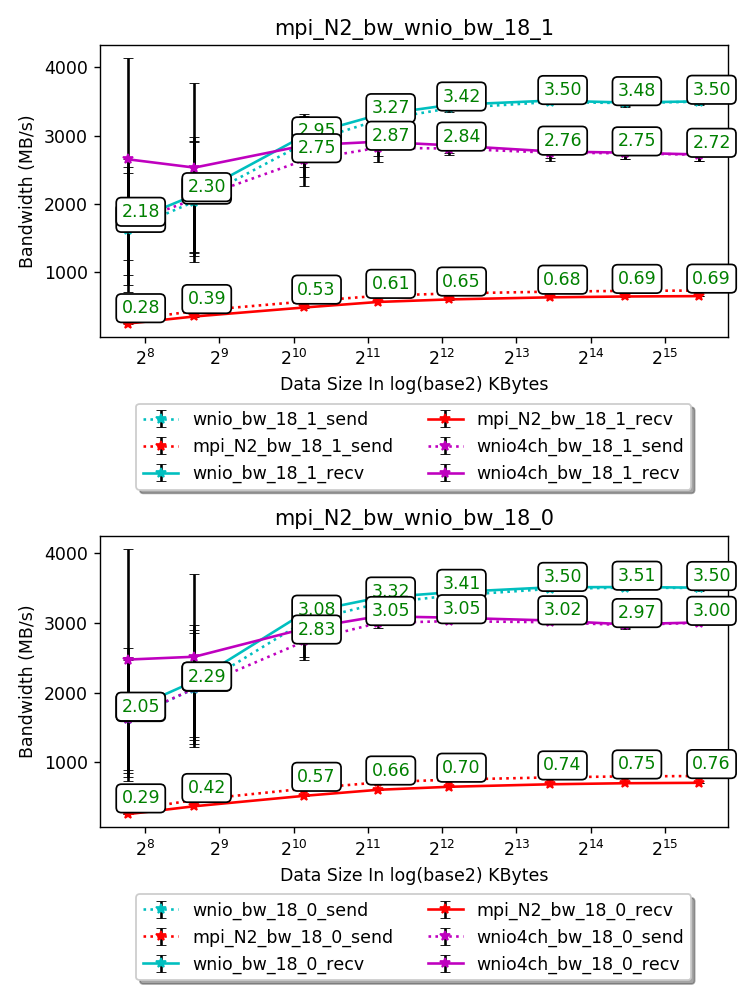

wnio_bw mpi_N2_bw 18_1
wnio_bw mpi_N2_bw 18_0
wnio_bw mpi_N2_bw 18_1
wnio_bw mpi_N2_bw 18_0
wnio4ch_bw mpi_N2_bw 18_1
wnio4ch_bw mpi_N2_bw 18_0
wnio4ch_bw mpi_N2_bw 18_1
wnio4ch_bw mpi_N2_bw 18_0


<IPython.core.display.Javascript object>


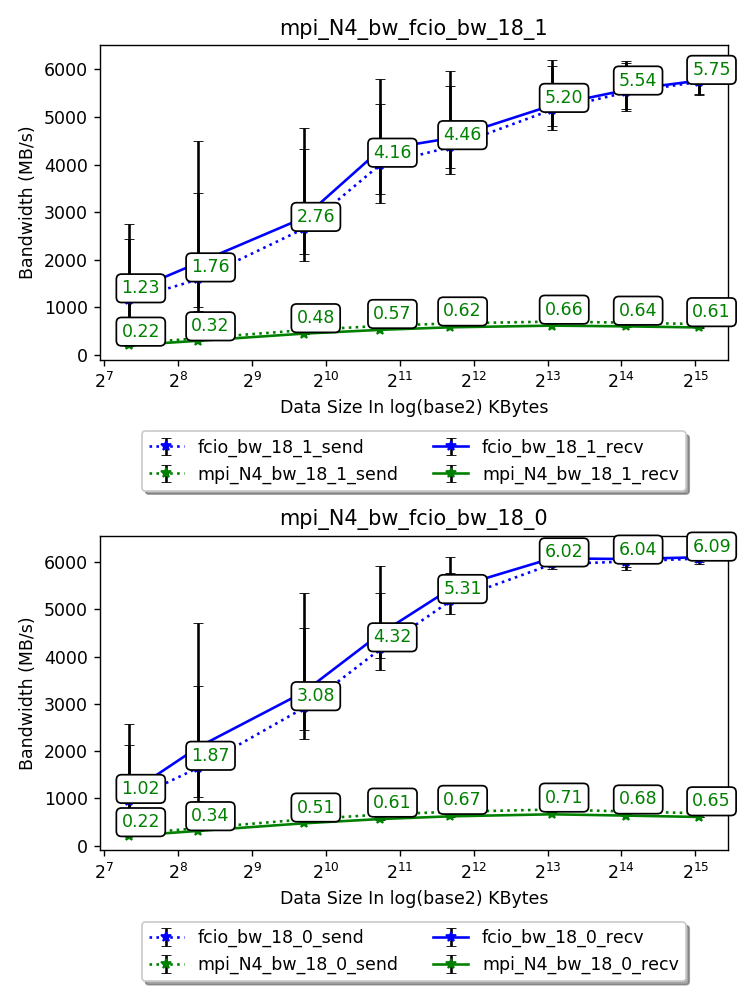

fcio_bw mpi_N4_bw 18_1
fcio_bw mpi_N4_bw 18_0
fcio_bw mpi_N4_bw 18_1
fcio_bw mpi_N4_bw 18_0


In [235]:
############################################
# MPI vs IO channels Comp
############################################


designs = [['wnio_bw','mpi_N2_bw', '18_1'], ['wnio_bw', 'mpi_N2_bw',  '18_0'],
           ['wnio4ch_bw','mpi_N2_bw', '18_1'], ['wnio4ch_bw', 'mpi_N2_bw',  '18_0'],
           ['fcio_bw','mpi_N4_bw',  '18_1'], [ 'fcio_bw', 'mpi_N4_bw','18_0']]
colors = [['c','r'],['c','r']]
fig, ax1, ax2 = plot_bw_comparison(data2node, designs[:2], ['s','r'], colors, savename='mpiio_bw_1', a=True)
colors = [['m','organge'],['m','organge']]
plot_bw_comparison(data2node, designs[2:4], ['s','r'], colors, savename='mpiio_bw_1', a=True, fig=fig, ax1=ax1, ax2=ax2, plot2=False)
colors = [['b','g'],['b','g']]
plot_bw_comparison(data4node, designs[4:], ['s','r'], colors, savename='mpiio_bw_2', a=True)


lines = ['-','-',':',':']

In [250]:

# designs = [['mpi_N2_bw', 'wnio_bw', '18_1'], ['mpi_N2_bw', 'wnio_bw',  '18_0'],
#            ['mpi_N4_bw','fcio_bw', '18_1'], [ 'mpi_N4_bw','fcio_bw','18_0']]

# # plot_comparison(data2node, designs[:2], 'e', savename='comp_mpiio_bw_e_1')
# # plot_comparison(data4node, designs[2:], 'e', savename='comp_mpiio_bw_e_2')

# plot_comparison(data2node, designs[:2], 'e', savename='comp_mpiio_bw_e_1')
# plot_comparison(data4node, designs[2:], 'e', savename='comp_mpiio_bw_e_2')